In [1]:
import numpy as np
import cv2
from numpy import matrix as M
import matplotlib.pyplot as plt
import os

In [2]:
def bin2dec(arr1):
    x = arr1.shape[0]
    decimal = 0
    for i in range(x):
        decimal = decimal + (2**i)*(arr1[6-i])
    return decimal

In [3]:
path = 'C:/Users/Aditya/Pictures/'
image_path = 'images.jpg'
original_image = cv2.imread(os.path.join(path , image_path))
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
cv2.imshow('grayscale image', gray_image)
new_image = np.zeros([gray_image.shape[0], gray_image.shape[1]], dtype = np.uint8)
y = np.zeros([gray_image.shape[0]+2, gray_image.shape[1]+2])
for i in range(1, gray_image.shape[0]+1):
    for j in range(1, gray_image.shape[1]+1):
        y[i, j] = gray_image[i-1, j-1]
print(y)

cv2.waitKey(0)
cv2.destroyAllWindows()

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  15.  16. ...  24.  24.   0.]
 [  0.  16.  16. ...  24.  23.   0.]
 ...
 [  0.  96.  90. ... 118. 127.   0.]
 [  0. 118. 111. ... 121. 124.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [4]:
list_3 = []
list_2 = []
for i in range(1, gray_image.shape[0]+1):
    for j in range(1, gray_image.shape[1]+1):
        list_2.append(1*(y[i, j] > y[i-1:i+2, j-1:j+2]))

In [5]:
for idx in list_2:
    new_pixel = np.zeros([9])
    #print(idx)
    for i in range(3):
        for j in range(3):
            new_pixel[3*i+j] = idx[i, j]
    #print(new_pixel)
    new_pixel = np.delete(new_pixel, 4)
    decimal = bin2dec(new_pixel)
    #print(type(decimal))
    list_3.append(decimal)

In [11]:
new_image = np.array(list_3).reshape(gray_image.shape[0], gray_image.shape[1])
print(new_image)
new_image1 = np.array(new_image, dtype = np.uint8)
cv2.imshow('new image', new_image)
backtorgb = cv2.cvtColor(new_image1,cv2.COLOR_GRAY2RGB)
cv2.imshow('color image', backtorgb)
cv2.imwrite(r'C:\Users\Aditya\Pictures\new_image1.png', new_image1)
cv2.imshow('grayscale image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[122. 120. 112. ... 244. 240. 245.]
 [106.  64. 104. ... 151. 135. 151.]
 [122.  96.  64. ... 135. 131. 151.]
 ...
 [ 94.   4.   0. ...  18.  48. 254.]
 [126. 116. 112. ...  10. 106. 255.]
 [255. 247. 247. ... 235. 235. 223.]]


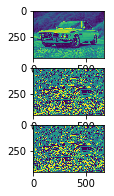

In [10]:
fig = plt.figure()
plt.subplot(411)
plt.imshow(gray_image)
plt.subplot(412)
plt.imshow(new_image)
plt.subplot(413)
plt.imshow(new_image1)